In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MaxNLocator

import os

os.makedirs('figures', exist_ok=True)


SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


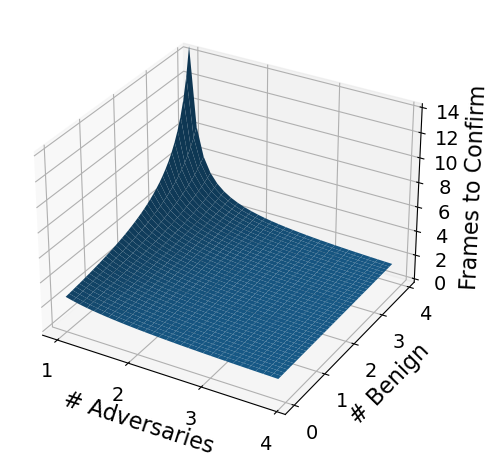

In [2]:
Pd = 0.9
beta_FT = 1e-6
beta_NT = 1e-9
det_R = 5
M = 3
alpha = 1e-4
beta = 1e-2
T_2 = np.log((1-beta)/alpha)
L0 = np.log(Pd*beta_NT/beta_FT)

K = lambda n_a, n_b: 1 + (T_2 - L0) / \
        (n_a * np.log(Pd/((2*np.pi)**(M/2)*beta_FT*np.sqrt(det_R))) + n_b * np.log(1-Pd))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n_as = np.arange(1, 4, 0.1)
n_bs = np.arange(0, 4, 0.1)
X, Y = np.meshgrid(n_as, n_bs)

zs = np.array(K(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)


ax.set_xlabel('# Adversaries')
ax.set_ylabel('# Benign')
ax.set_zlabel('Frames to Confirm')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_zlim([0, 14])
plt.tight_layout()
plt.savefig('figures/frames-to-confirm.pdf')
plt.show()

In [3]:
for na in range(4):
    for nb in range(4):
        print(f"na: {na}, nb: {nb} -- frames: {K(na,nb):.2f}")

na: 0, nb: 0 -- frames: inf
na: 0, nb: 1 -- frames: -6.04
na: 0, nb: 2 -- frames: -2.52
na: 0, nb: 3 -- frames: -1.35
na: 1, nb: 0 -- frames: 2.60
na: 1, nb: 1 -- frames: 3.07
na: 1, nb: 2 -- frames: 3.92
na: 1, nb: 3 -- frames: 6.00
na: 2, nb: 0 -- frames: 1.80
na: 2, nb: 1 -- frames: 1.90
na: 2, nb: 2 -- frames: 2.03
na: 2, nb: 3 -- frames: 2.21
na: 3, nb: 0 -- frames: 1.53
na: 3, nb: 1 -- frames: 1.58
na: 3, nb: 2 -- frames: 1.63
na: 3, nb: 3 -- frames: 1.69


/tmp/ipykernel_542313/916158126.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  K = lambda n_a, n_b: 1 + (T_2 - L0) / \
